In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout , BatchNormalization 
from keras.optimizers import Adam 
from keras.utils import to_categorical
from keras.models import Sequential 
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# loading the dataset 
(X_train , y_train ) , (X_test , y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0
# we have normalized the data 


In [5]:
# one hot encode the labels 
import numpy as np 
y_train = to_categorical(y_train , len(np.unique(y_train)))
y_test = to_categorical(y_test , len(np.unique(y_test)))


### Building the AlexNet Model using keras 


In [6]:
model = Sequential()

# first Convulation layer 
model.add(Conv2D(filters = 96 , kernel_size=(3,3) , input_shape = (32,32, 3) , padding = 'same' , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

# Second Convulation Layer 
model.add(Conv2D(filters = 256 , kernel_size=(3,3) , padding='same' , activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

# third Convulation Layer
model.add(Conv2D(filters = 384 , kernel_size=(5,5) , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())

# fourth Convulation Layer
model.add(Conv2D(filters = 384 , kernel_size=(5,5) , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())

# fifth Conv layer 
model.add(Conv2D(filters = 256 , kernel_size=(5,5) , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

# flatten Conv layer
model.add(Flatten())
model.add(Dense(4096 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10 , activation='softmax'))

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 384)      │     2,457,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 384)      │     3,686,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │     2,457,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,435,850 (161.88 MB)

 Trainable params: 42,433,098 (161.87 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [7]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])


In [8]:
from gc import callbacks
from keras.callbacks import ModelCheckpoint

callback = ModelCheckpoint(filepath= 'best_model_alexNet.keras' , save_best_only=True)

hist= model.fit(X_train , y_train , batch_size=32 , epochs = 10 , verbose = 1 , validation_data = (X_test , y_test ) , callbacks= callback )


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 53ms/step - accuracy: 0.2964 - loss: 2.8344 - val_accuracy: 0.4569 - val_loss: 1.5579
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.5224 - loss: 1.4182 - val_accuracy: 0.6353 - val_loss: 1.0856
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6549 - loss: 1.0544 - val_accuracy: 0.6685 - val_loss: 1.0113
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.7448 - loss: 0.7844 - val_accuracy: 0.7374 - val_loss: 0.7979
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.8041 - loss: 0.6048 - val_accuracy: 0.7073 - val_loss: 0.9349
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.8497 - loss: 0.4622 - val_accuracy: 0.6919 - val_loss: 0.9934
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.8837 - loss: 0.3622 - val_accuracy: 0.7558 - val_loss: 0.7898
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.9128 -

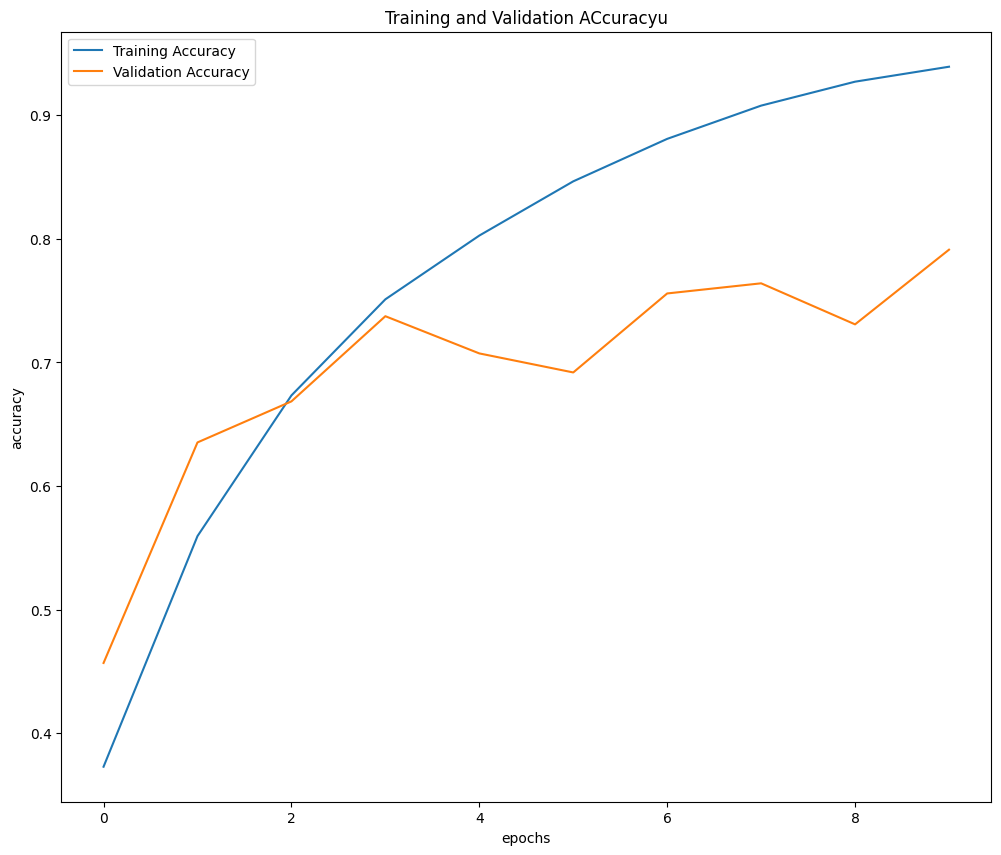

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

fig = plt.figure(figsize=(12, 10))
plt.plot(hist.history['accuracy'], label = 'Training Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Training and Validation ACcuracyu")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


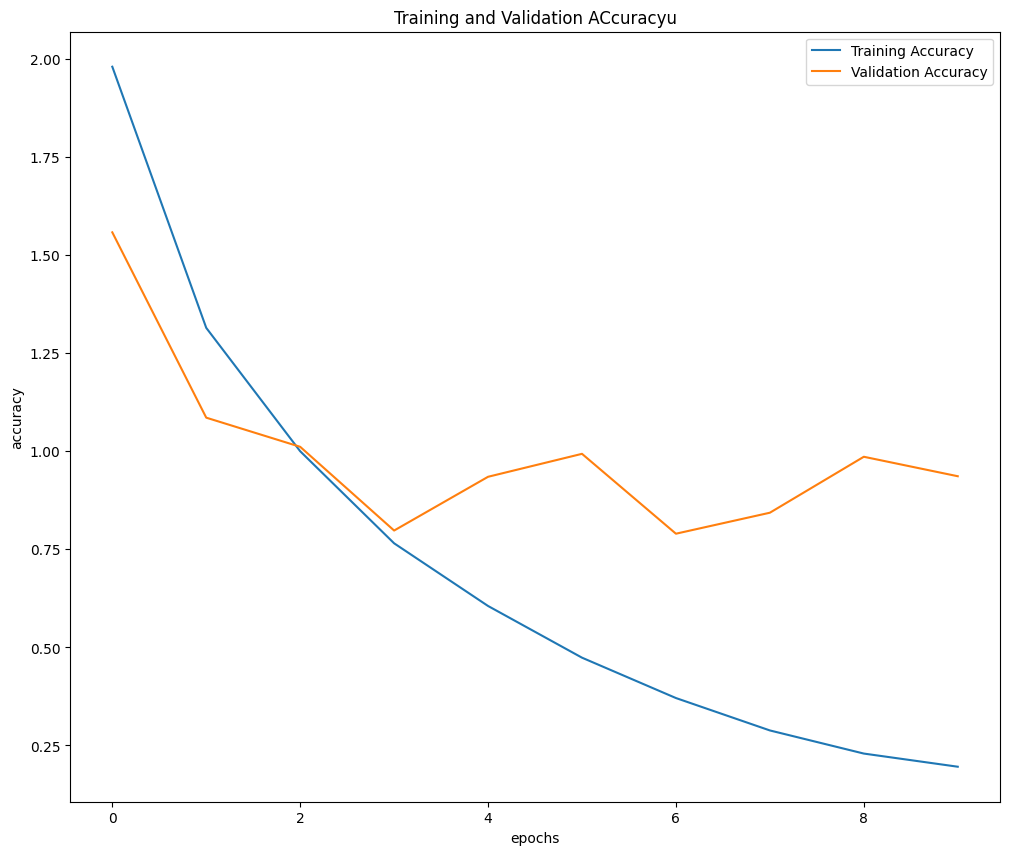

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

fig = plt.figure(figsize=(12, 10))
plt.plot(hist.history['loss'], label = 'Training Accuracy')
plt.plot(hist.history['val_loss'], label = 'Validation Accuracy')
plt.title("Training and Validation ACcuracyu")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [11]:
test_loss , test_acc = model.evaluate(X_test , y_test , verbose = 1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7924 - loss: 0.9412


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


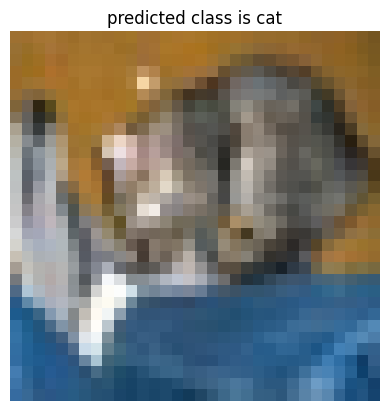

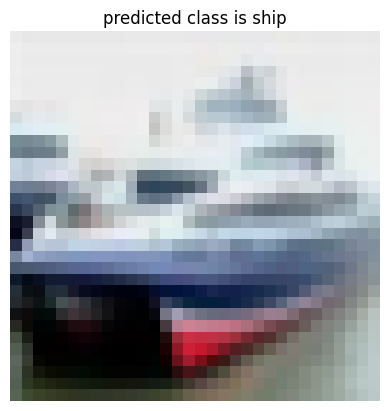

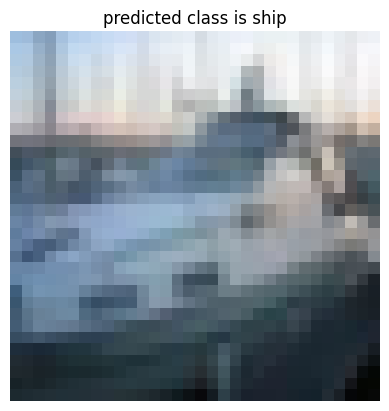

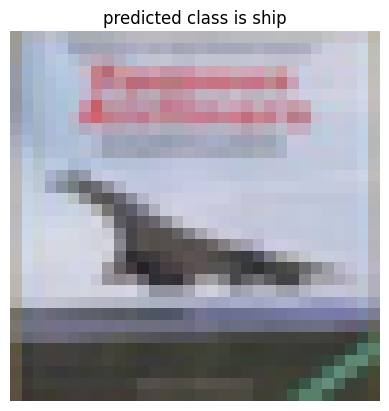

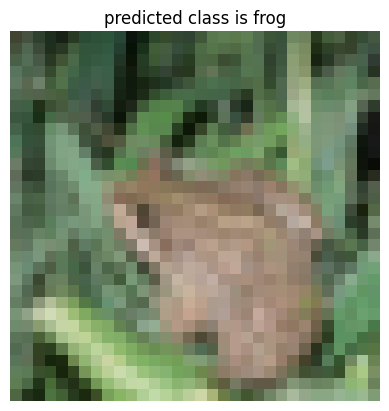

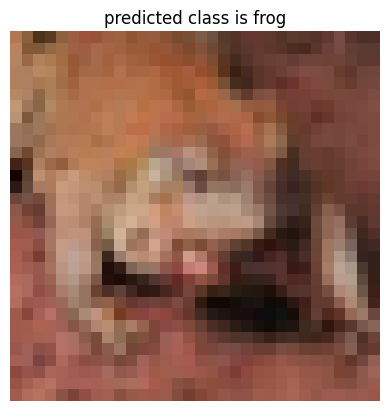

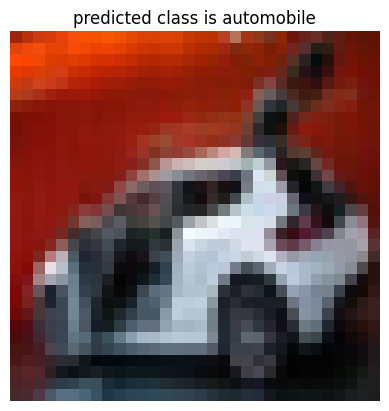

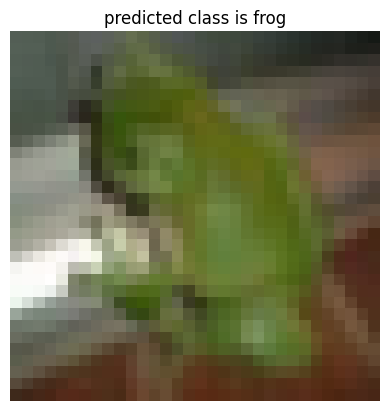

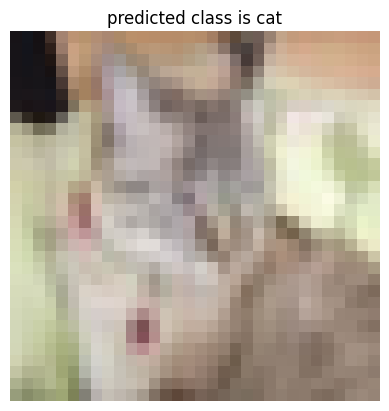

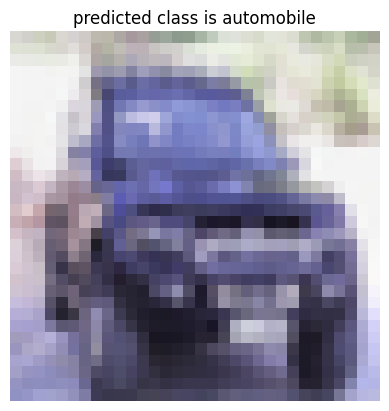

In [ ]:
class_names = ['airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']


preds= model.predict(X_test[:10])
for i , preds in enumerate(preds):
    plt.imshow(X_test[i])
    plt.title(f"predicted class is {class_names[preds.argmax()]}")
    plt.axis('off')
    plt.show()
